# Billboard Top 100: Through the Decades (1965-2015)

In [123]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import seaborn as sns

import networkx as nx

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from gensim import corpora, models

import spacy
import nltk

from helper import *

In [354]:
#TfidfVectorizer(norm='l2', min_df=2, max_df=0.65, use_idf=True, smooth_idf=False, sublinear_tf=True, stop_words=stop)
        
def plot_top_20(fitted_and_transformed, feature_names, decade):
    plt.subplots(dpi=300)
    sns.set(font_scale=.8)

    sorted_words = sorted(list(zip(feature_names, 
                                   np.asarray(fitted_and_transformed.sum(axis=0)).ravel())), 
                               key=lambda x: x[1], reverse=True)
    words, count = [i[0] for i in sorted_words], [i[1] for i in sorted_words]
    top_words = pd.DataFrame(data={'Word' : words, 'Count': count}).take([1, 0], axis=1).iloc[np.arange(20)]
    plt.title('Word Count From Songs of the '+ str(decade) + 's')
    sns.barplot(x = top_words['Count'], y=top_words['Word'], palette=("GnBu_d"));

def NMF_topics(lyrics, num_topics, num_words, change_max_df=0.95, change_min_df=2):
    vectorizer = TfidfVectorizer(max_df=change_max_df, min_df=change_min_df, stop_words=stop)
    tfidf = vectorizer.fit_transform(lyrics)
    tfidf_fn = vectorizer.get_feature_names()
    NMF_model = NMF(n_components=num_topics, random_state=1, init='nndsvd').fit(tfidf)
    show_sk_topics(NMF_model, tfidf_fn, num_words)
    
#Found this online
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores[:20]:
        print("{0:10} Score: {1}".format(item[0], item[1]))

----

# The Data

In [124]:
lyrics = pd.read_csv('billboard.csv', encoding = "latin1")
lyrics.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


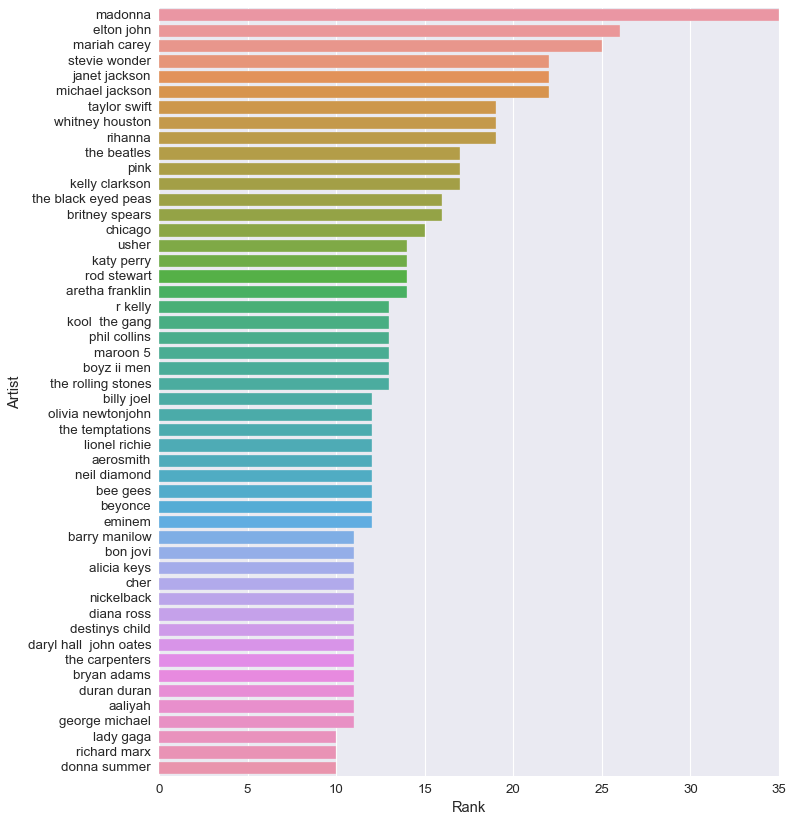

In [122]:
plt.figure(figsize=(10, 12))
sns.set(font_scale=1.2)
artist = lyrics.groupby('Artist').count()
num_b = artist.sort_values('Rank', ascending=False)[:50]

sns.barplot(y=num_b.index, x=num_b['Rank'], orient='h', order=num_b.index);

In [332]:
from sklearn.feature_extraction import stop_words

more_stop_words = set(['im', 'like', 'it', 'dont', 'aint', 'ive', 'ill', 
                       'wont', 'gonna', 'youre','just','got','theres',
                       'let','oh', 'come', 'want', 'good','make', 'cause',
                       'shes', 'hes', 'lets', 'theyll', 'youll', 'youve',
                       'id', 'thats', 'way', 'wanna', 'know', 'imma', 'theyre'])
stop = stop_words.ENGLISH_STOP_WORDS.union(more_stop_words)

----
## Through the Decades

## 1965-1969

Implementing a topic model for the years 1965-1969, the first decade in this analysis.

In [344]:
decade1lyrics = lyrics[lyrics['Year'] < 1970]['Lyrics'].values
decade1lyrics = [i for i in decade1lyrics if type(i) == str] #Handle NaN values.

#tfidf1_vectorizer = TfidfVectorizer(max_df=0.25, min_df=2, stop_words=stop)
#tfidf1 = tfidf_vectorizer.fit_transform(decade1lyrics)
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()

count_vec1 = CountVectorizer(max_df=0.65, min_df=2, stop_words=stop)
cv1 = count_vec1.fit_transform(decade1lyrics)
cv_fn1 = count_vec1.get_feature_names()

decade1LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=29, 
                                       learning_decay=.7,
                                       max_iter=130,
                                       learning_method='online').fit(cv1)

show_sk_topics(decade1LDA, cv_fn1, 15)

Topic 0:
girl yeah comes say laughing day mony proud dance time feel shake monday morning magic
Topic 1:
love world need na sweet lovin day happy life baby girl mind think gimme thing
Topic 2:
babe did didnt moment says hold eyes new heart kiss mind true mean sky love
Topic 3:
hey yeah man home dig baby little bit ah da place soul said hair real
Topic 4:
ha red black day washed look away people summer born blue lady uh yellow free
Topic 5:
baby love la time long little heart help tell say away stop wait hear need


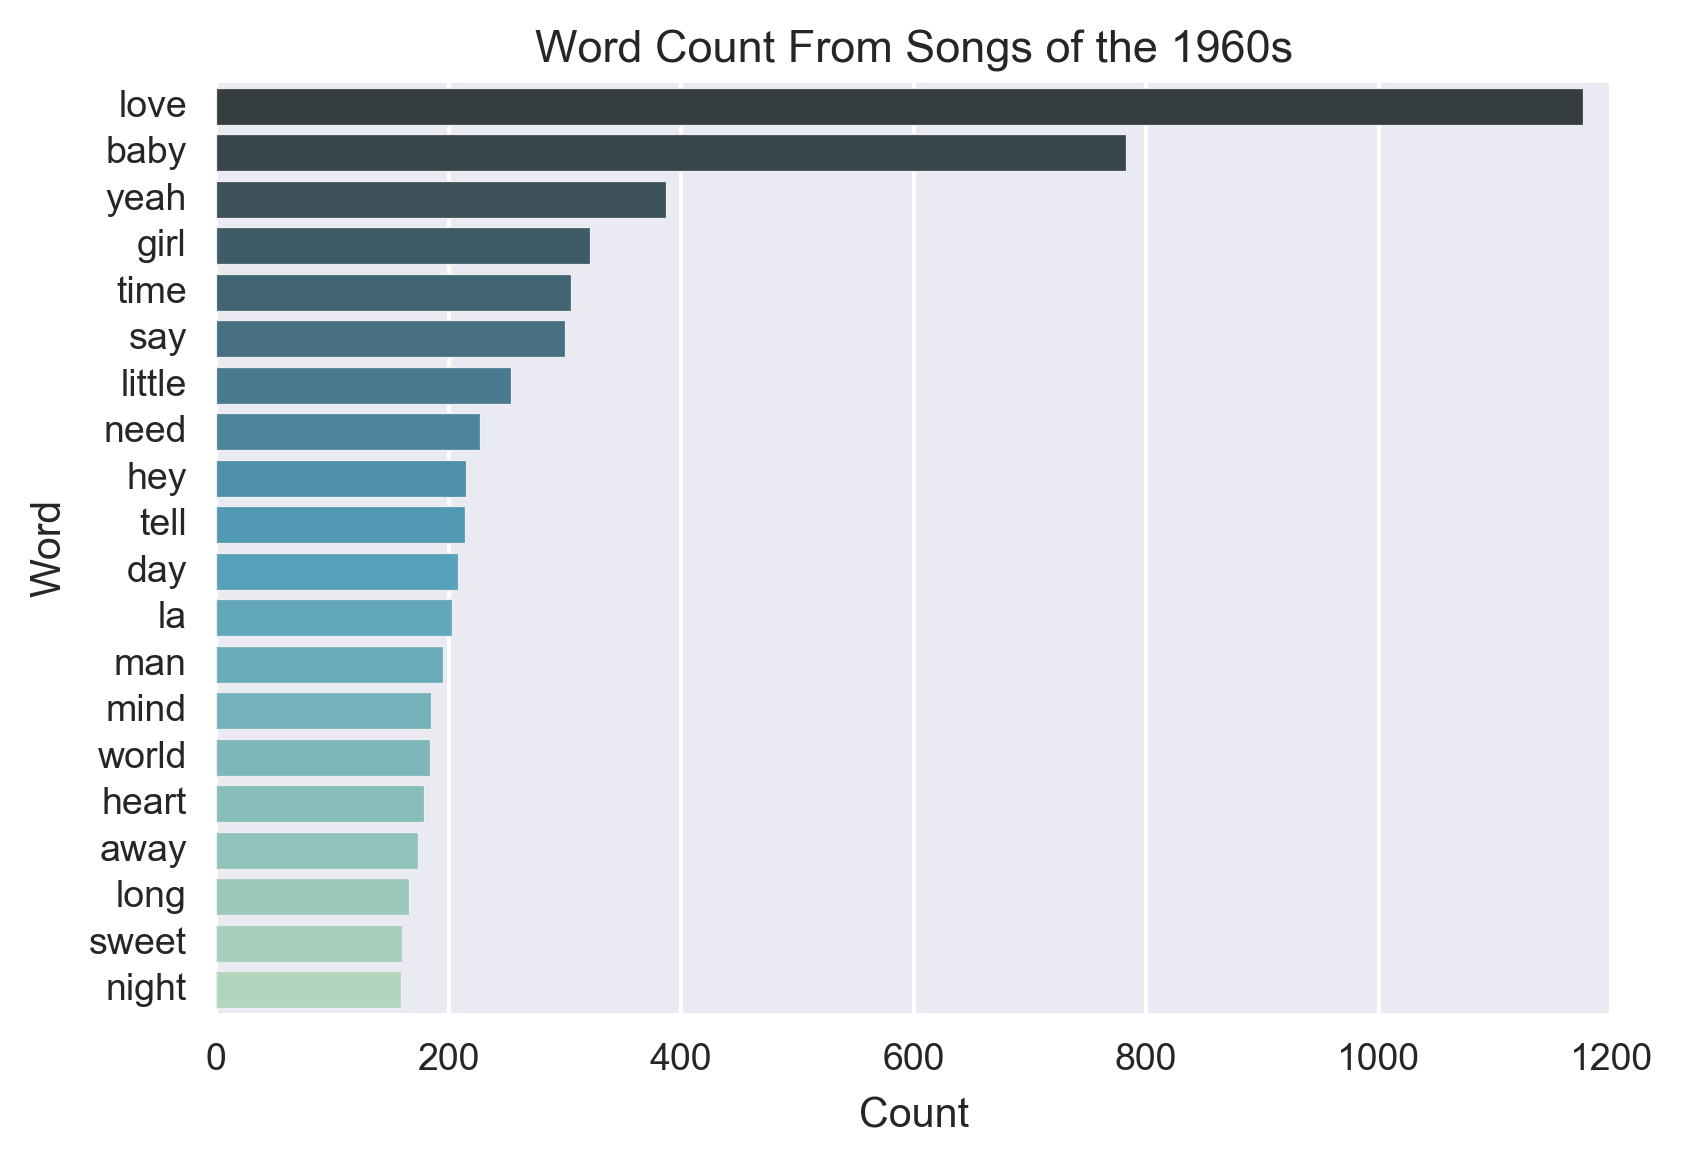

In [350]:
plot_top_20(cv1, cv_fn1, 1960)

----
## 1970-1979

In [254]:
decade2lyrics = lyrics[lyrics['Year'].between(1970, 1979, inclusive=True)]['Lyrics'].values
decade2lyrics = [i for i in decade2lyrics if type(i) == str]

count_vec2 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv2 = count_vec2.fit_transform(decade2lyrics)
cv_fn2 = count_vec2.get_feature_names()

decade2LDA = LatentDirichletAllocation(n_components=5, 
                                       batch_size=50, 
                                       learning_decay=.65,
                                       max_iter=50,
                                       learning_method='online').fit(cv2)

show_sk_topics(decade2LDA, cv_fn2, 15)

Topic 0:
dance boogie shake baby music sing easy gimme born yeah song burn disco tonight right
Topic 1:
night man away time said rock little roll old boy day life run blue way
Topic 2:
la da yeah hot bring em funk thing money said light friends lookin doin talkin
Topic 3:
woman doo ya hey night high new yeah somebody band morning dancing ride mind rain
Topic 4:
love baby know time way say feel right need tell ooh girl yeah little sweet


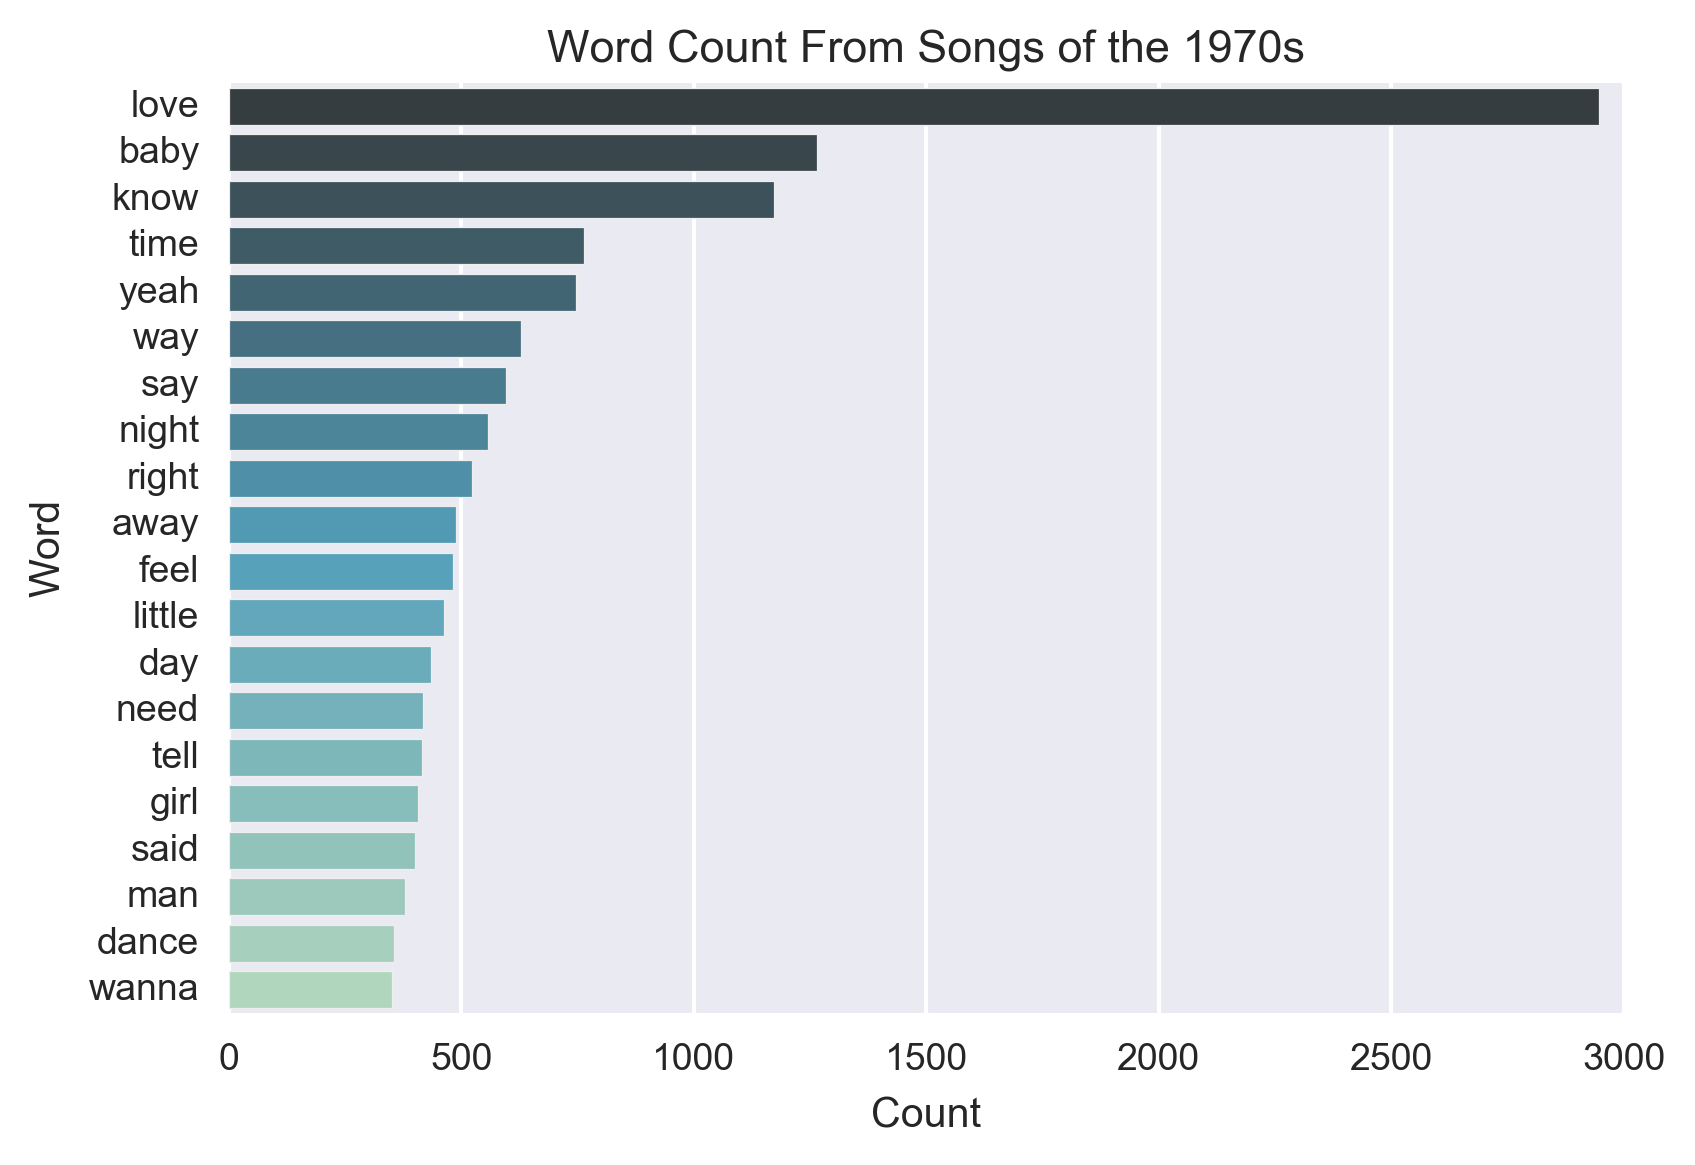

In [353]:
plot_top_20(cv2, cv_fn2, 1970)

## 1980-1990

In [267]:
decade3lyrics = lyrics[lyrics['Year'].between(1980, 1989, inclusive=True)]['Lyrics'].values
decade3lyrics = [i for i in decade3lyrics if type(i) == str]

count_vec3 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv3 = count_vec3.fit_transform(decade3lyrics)
cv_fn3 = count_vec3.get_feature_names()

decade3LDA = LatentDirichletAllocation(n_components=4, 
                                       batch_size=6, 
                                       learning_decay=.65,
                                       max_iter=50,
                                       learning_method='online').fit(cv3)

show_sk_topics(decade3LDA, cv_fn3, 15)

Topic 0:
time know night say baby tell girl right tonight feel away think dance hear mind
Topic 1:
na la talk girls man uh said look money theyre walk big town movin em
Topic 2:
yeah little ooh baby rock bad feel love wild hot thing boy ah round roll
Topic 3:
love know heart need baby life world hold true stand touch eyes away dream live


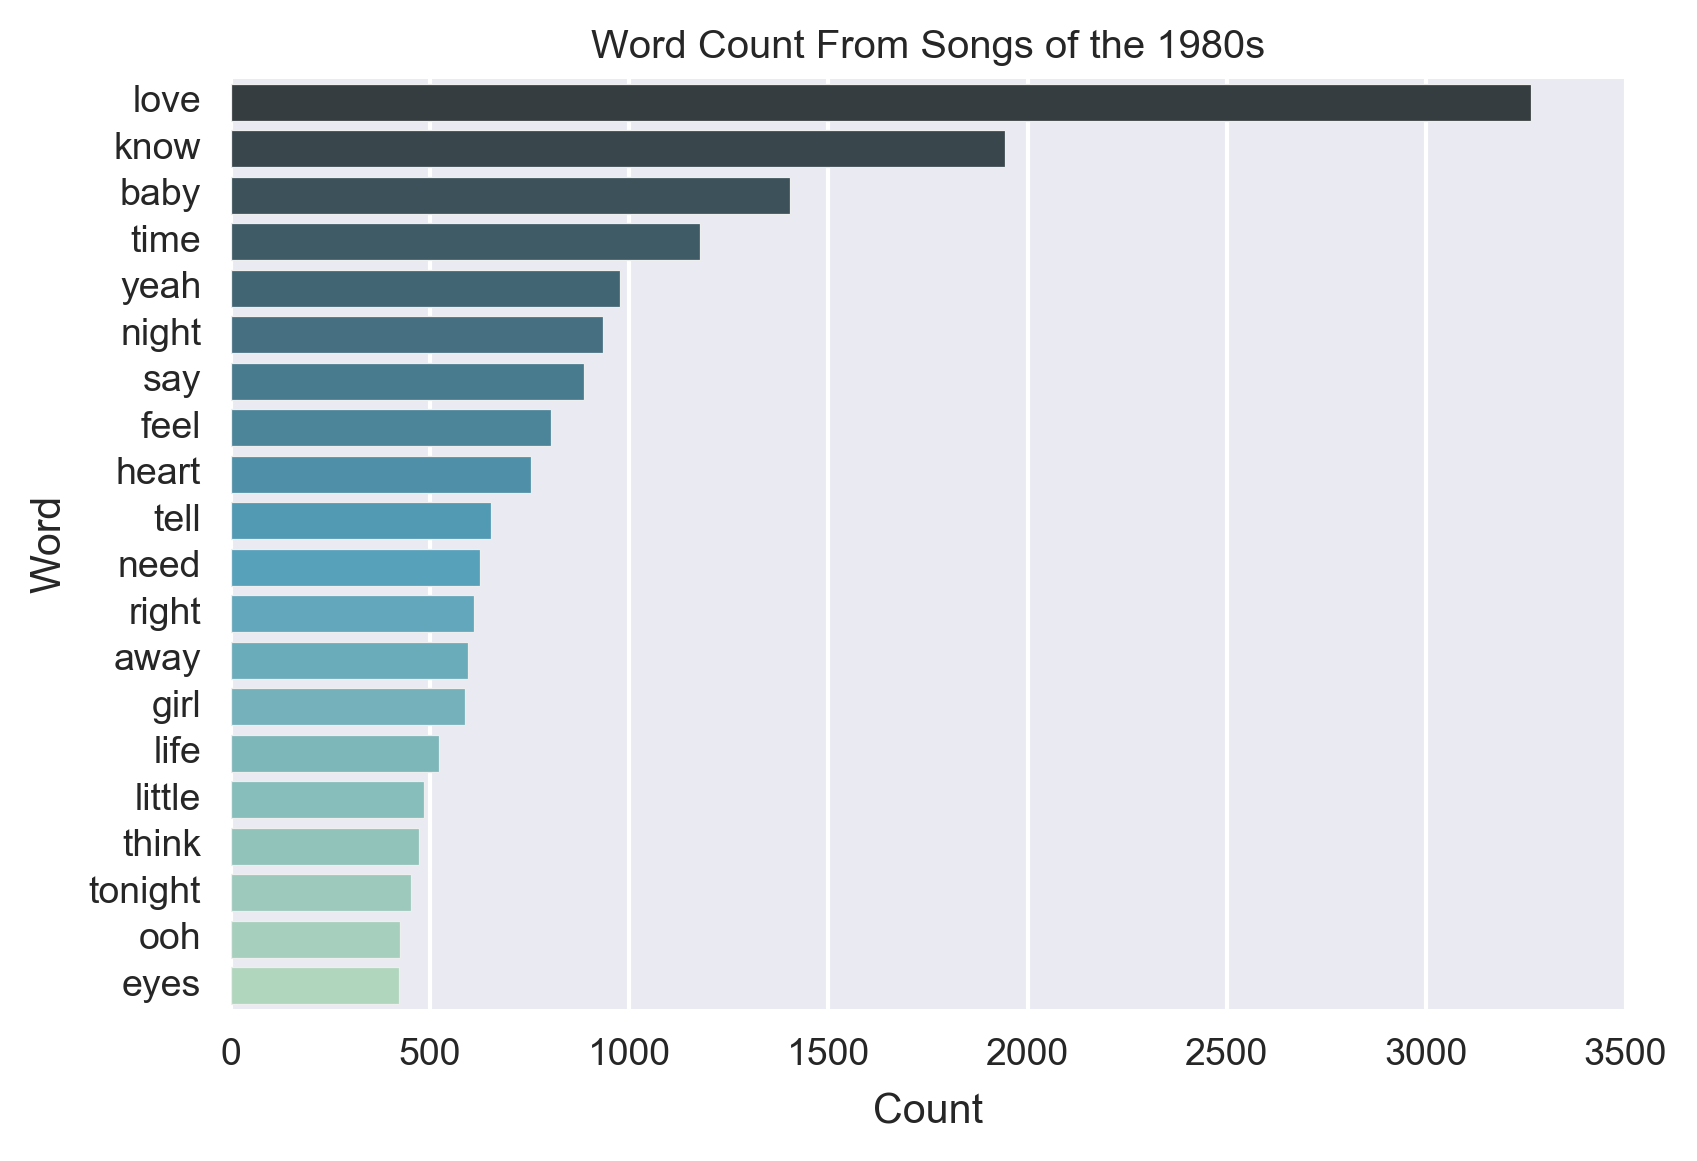

In [355]:
plot_top_20(cv3, cv_fn3, 1980)

## 1990-2000

In [336]:
decade4lyrics = lyrics[lyrics['Year'].between(1990, 1999, inclusive=True)]['Lyrics'].values
decade4lyrics = [i for i in decade4lyrics if type(i) == str]

count_vec4 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv4 = count_vec3.fit_transform(decade4lyrics)
cv_fn4 = count_vec3.get_feature_names()

decade4LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=45, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv4)

show_sk_topics(decade4LDA, cv_fn4, 15)

Topic 0:
yeah body dance shake gotta mind feel ah music baby say people hear night round
Topic 1:
ya know la jam yo niggaz shit nigga yall wit pump dat money wild big
Topic 2:
da na jump power nah di know gettin break boogie jumps whoa murderer getting slam
Topic 3:
man roll ride play days seen know kick better girls em doo think dip say
Topic 4:
baby love know girl need little real really right tell turn boy yeah feel alright
Topic 5:
love know time heart life say feel tell away need right world day night believe


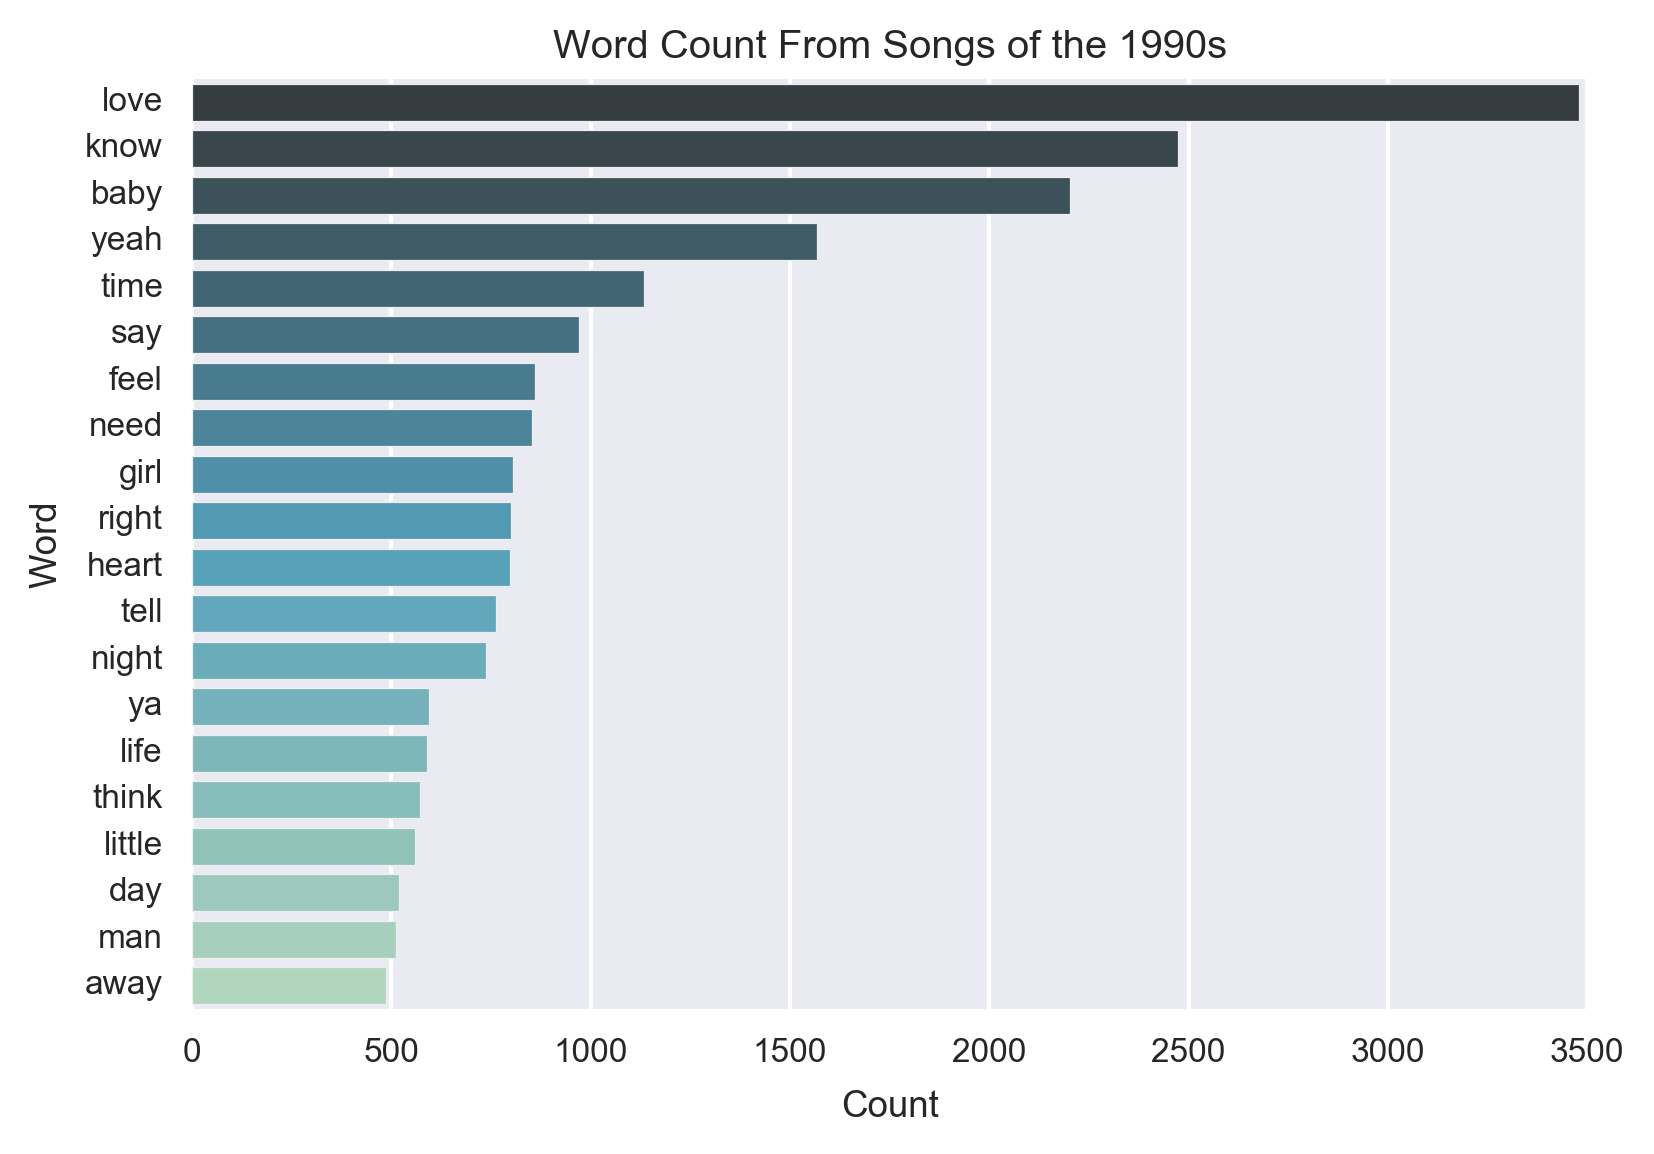

In [356]:
plot_top_20(cv4, cv_fn4, 1990)

In [343]:
NMF_topics(decade4lyrics, 5, 15)

Topic 0:
time say feel heart tell away life think need day world said right hold look
Topic 1:
na da murderer di nah rush lovely eh uhh hm nana stepper lyrical gangster hmm
Topic 2:
love heart night girl believe need forever hold dream true hurt real right knew eyes
Topic 3:
baby girl need gotta tonight babe body wants ooh night right tell sweet boy til
Topic 4:
yeah dance hey ya ah da everybody rock shit nigga funky body crazy yall doing


----
## 2000-2010

In [280]:
decade5lyrics = lyrics[lyrics['Year'].between(2000, 2009, inclusive=True)]['Lyrics'].values
decade5lyrics = [i for i in decade5lyrics if type(i) == str]

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
cv5 = cv.fit_transform(decade5lyrics)
cv_fn5 = cv.get_feature_names()

decade5LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=40, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv5)

show_sk_topics(decade5LDA, cv_fn5, 15)

Topic 0:
na ay boy ooh dem bay turn wee hey boom big eh ya yo di
Topic 1:
wit la shit uh ya hey nigga hot em rock ass pop gon fuck club
Topic 2:
dance ya ah music turn stop goes break night people everybody play floor step lights
Topic 3:
da bum walk ha ba fine hump clean bedum mind rew body dee moves kisskiss
Topic 4:
girl baby say right man need gotta tell ya yeah shake head bout girls think
Topic 5:
love baby time life yeah say feel away right heart need world think day girl


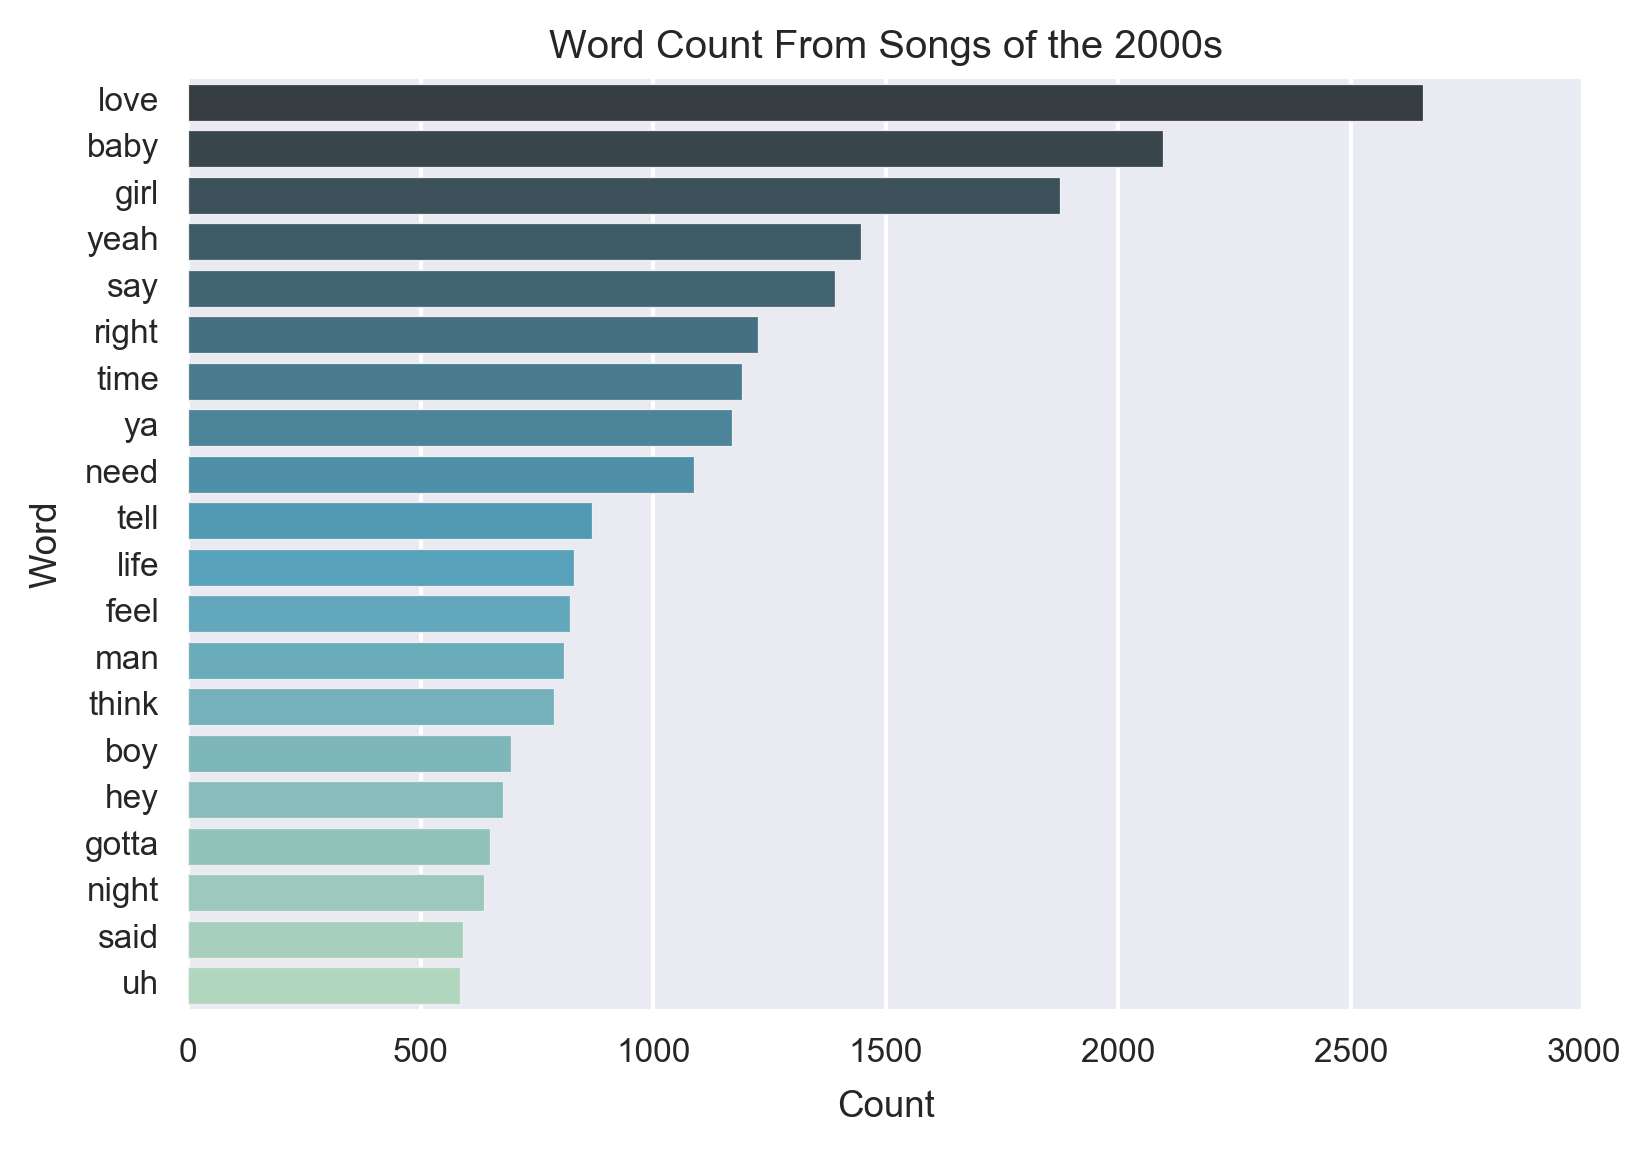

In [357]:
plot_top_20(cv5, cv_fn5, 2000)

----
## 2010-2015

In [333]:
recent_lyrics = lyrics[lyrics['Year'].between(2010, 2015, inclusive=True)]['Lyrics'].values
recent_lyrics = [i for i in recent_lyrics if type(i) == str]

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
cv6 = cv.fit_transform(recent_lyrics)
cv_fn6 = cv.get_feature_names()

recent_LDA = LatentDirichletAllocation(n_components=9, 
                                       batch_size=75, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv6)
show_sk_topics(recent_LDA, cv_fn6, 15)

Topic 0:
yeah whoa break run deep hard wish wiggle uh fall heart black ah remind right
Topic 1:
eh aah hear say animals wake counting comes inside heart hide summertime fall tonight champion
Topic 2:
na hey boom bass bout boy girl time whoaoh whats heart treble right chains rude
Topic 3:
love baby ooh bad better say heart yeah lie need feel gotta watch girl time
Topic 4:
low sexy op gangnam coco style lady oppa hey girl zone yes baby guy neo
Topic 5:
bright shine solo beautiful diamond sky ridin diamonds belong demons place trouble kind river safe
Topic 6:
baby night tonight turn yeah hands home time little everybody hey right party dance lights
Topic 7:
going hitta moves tu right places tie knows yeah goin head jagger que hold gusta
Topic 8:
la love girl tell money right need life yeah feel fuck time bitch look nigga


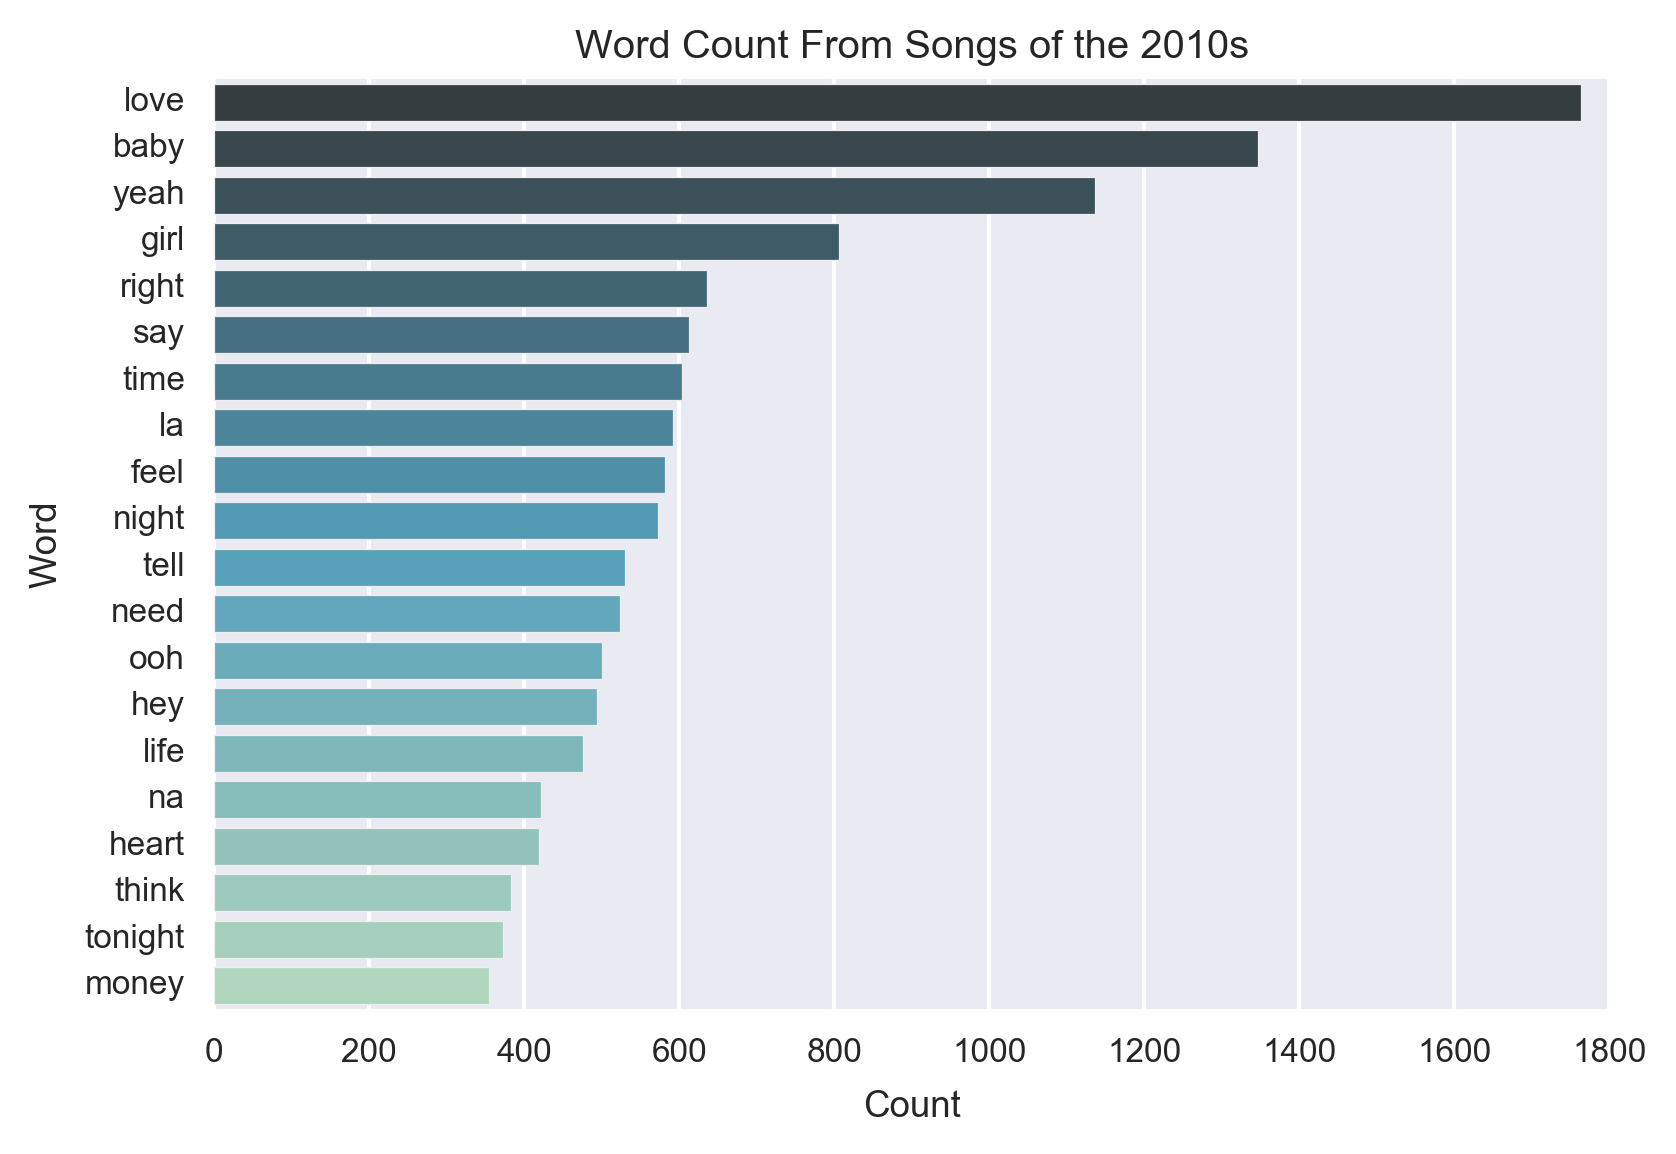

In [358]:
plot_top_20(cv6, cv_fn6, 2010)

## The Frequency of Love across each year

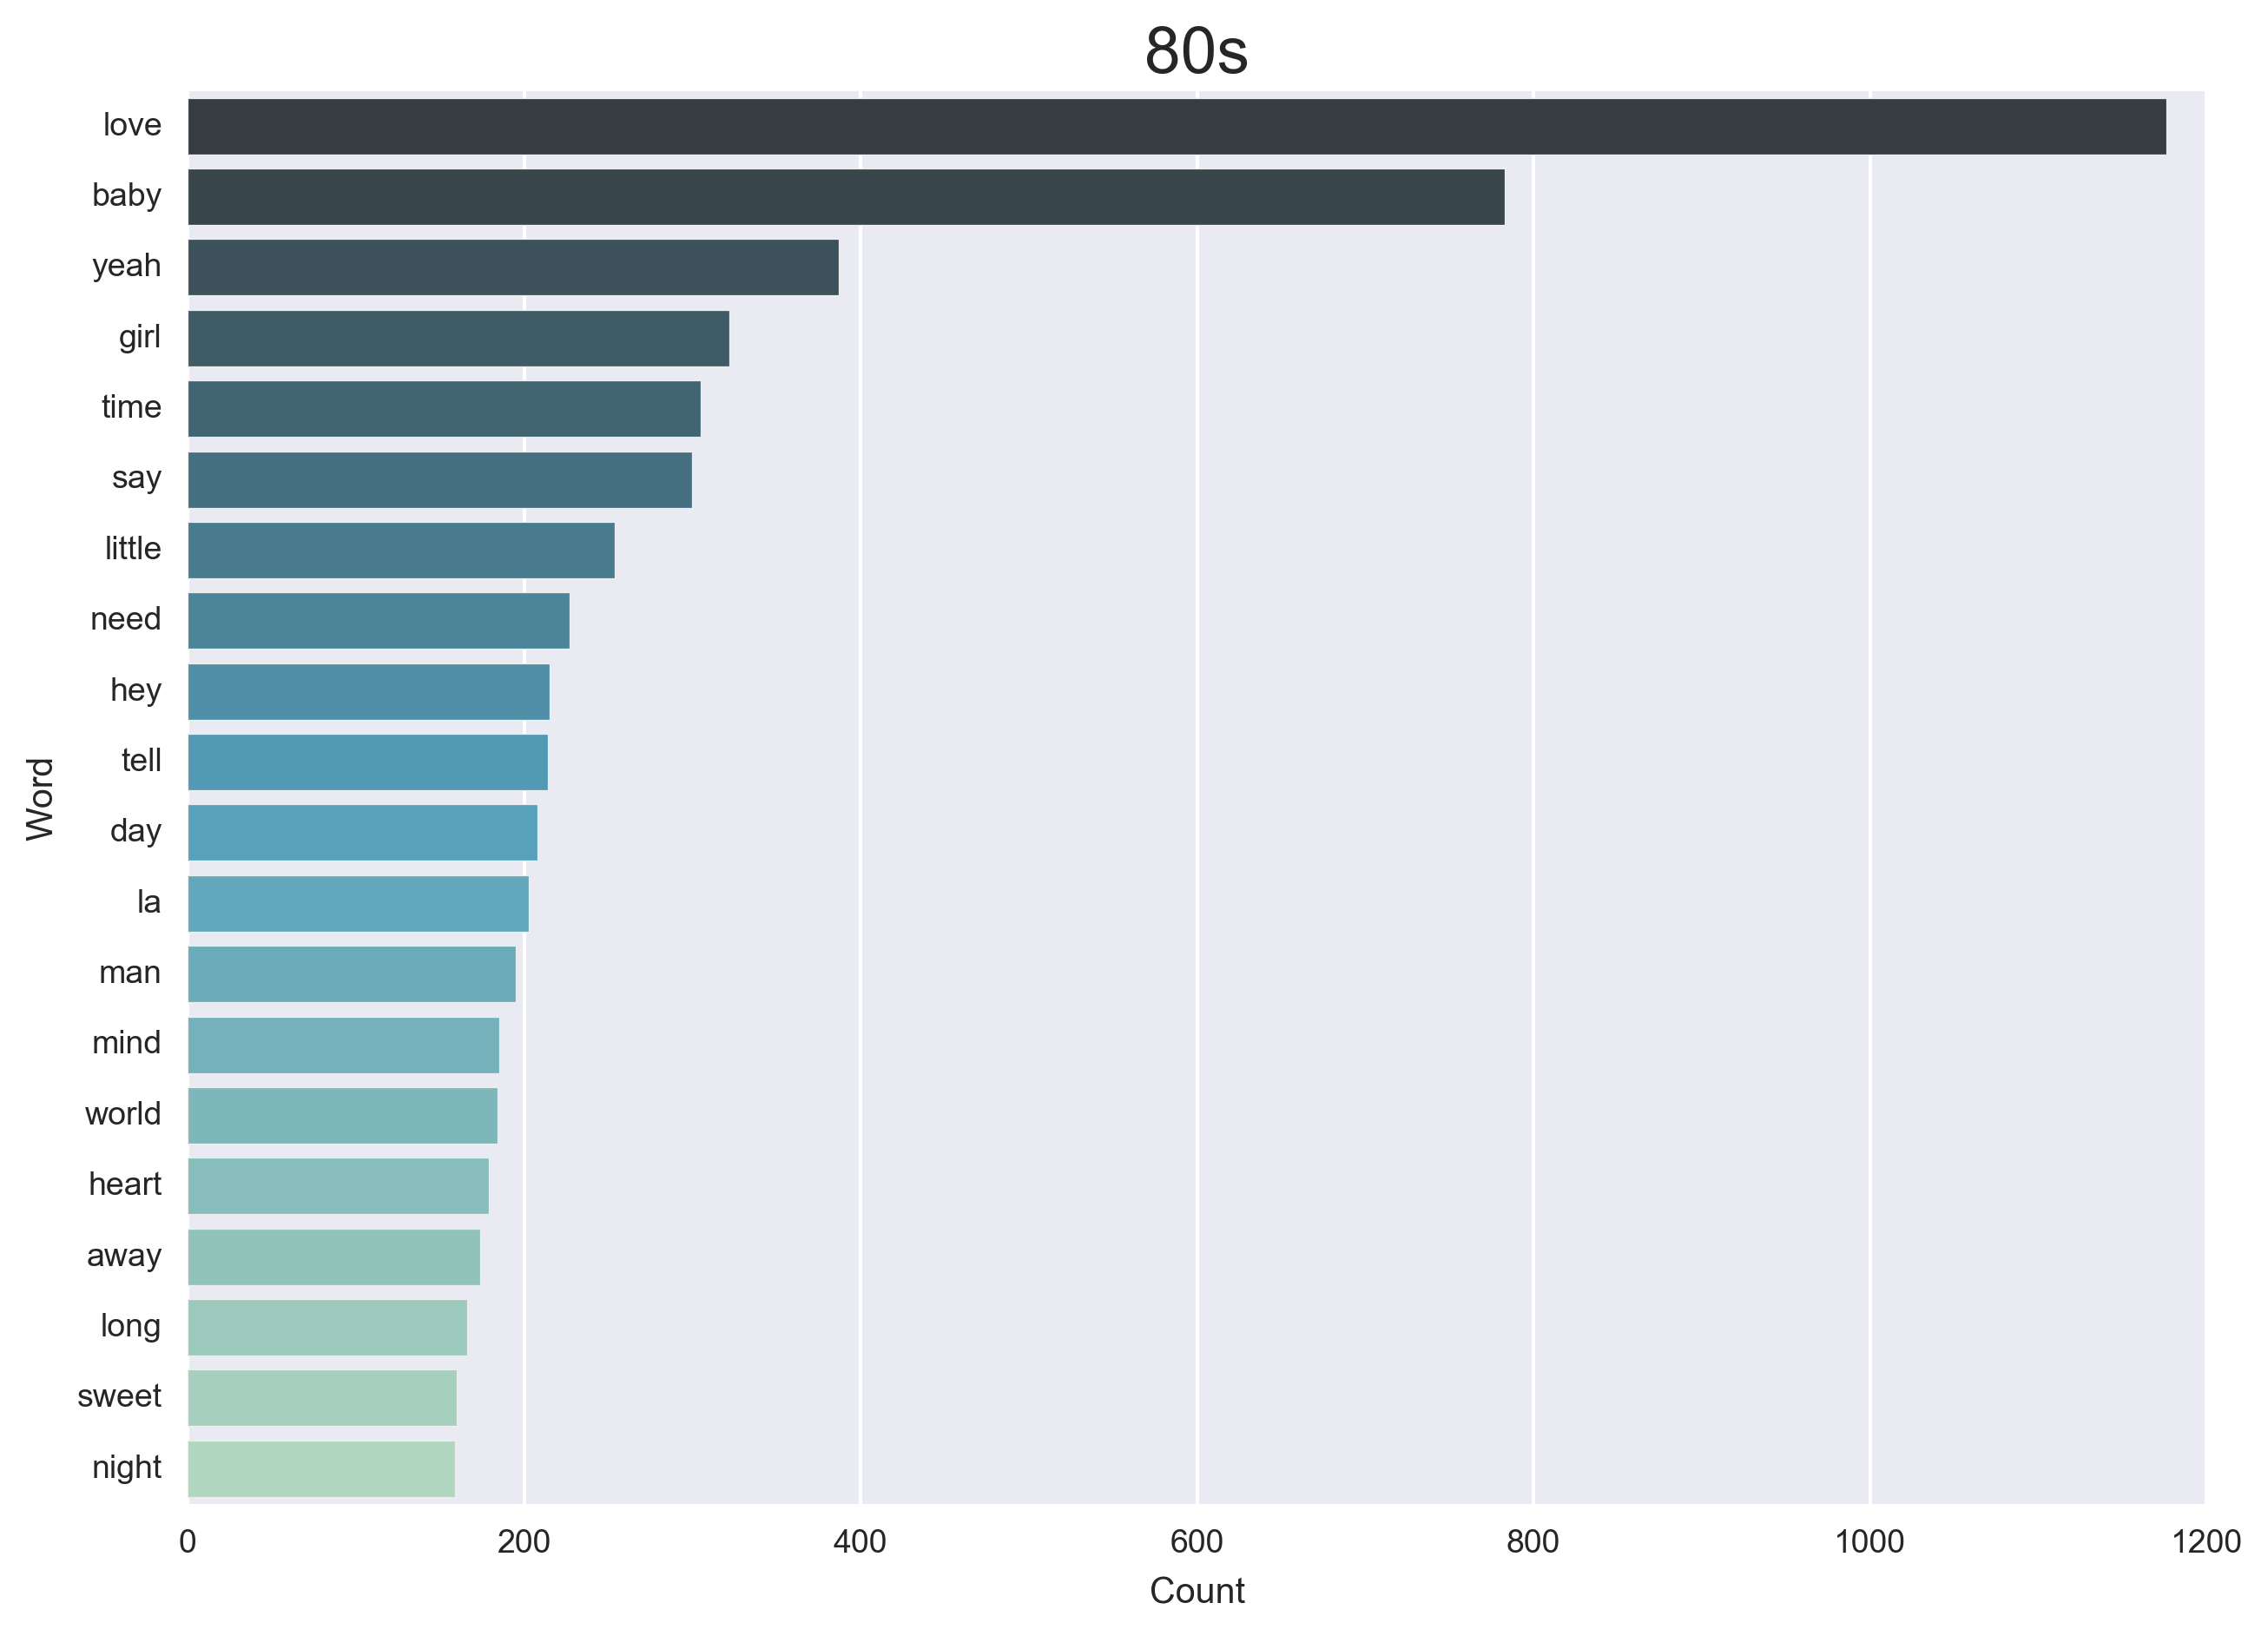

In [346]:
####Backup code for bar charts.
plt.subplots(figsize=(10,7), dpi=300)
sns.set(font_scale=1.5)

sorted_words1 = sorted(list(zip(cv_fn1, np.asarray(cv1.sum(axis=0)).ravel())), key=lambda x: x[1], reverse=True)
words, count = [i[0] for i in sorted_words1], [i[1] for i in sorted_words1]
top_words1 = pd.DataFrame(data={'Word' : words, 'Count': count}).take([1, 0], axis=1).iloc[np.arange(20)]
plt.title('80s')
sns.barplot(x = top_words1['Count'], y=top_words1['Word'], palette=("GnBu_d"));